# Virtual Pruning

## Importing the digitized structure

In [20]:
from openalea.mtg import *
import numpy as np
from importlib import reload
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()

In [21]:
from matplotlib.pyplot import *
import mtgplot as mp

In [22]:
#sw = mp.plot_tree(g, leaves=True)
#sw


# Pruning

In [23]:
import pruning ; reload(pruning)
from pruning import *

In [24]:
prunedmtg = prune(g, 180)

In [25]:
intensity = continuous_intensity_from_pruned(prunedmtg)
print(intensity, intensity_level(intensity))

0.5382768156206773 T3


In [26]:
prunedrepr = mp.representation(prunedmtg, wood = False, leaves=True)

# Light sensitivity

In [27]:
import lightestimation; reload(lightestimation)
from lightestimation import *

In [28]:
TrPPFD_ref, Zeta_ref = daily_light_variables(prunedrepr)

In [29]:
TrPPFD, Zeta = daily_light_variables(prunedrepr, skydiscretization=16)

In [30]:
Zeta

,7H,8H,9H,10H,11H,12H,13H,14H,15H,16H,17H,18H
27,0.925321,NaN,1.002526,0.838578,0.833216,1.051967,0.817345,1.043831,0.804728,1.099732,1.076453,0.966069
28,0.838999,NaN,0.884200,0.723130,NaN,1.068050,NaN,0.854548,0.807491,1.062886,0.960615,1.045112
31,1.104018,1.032501,1.103991,1.103970,NaN,1.009714,1.094634,1.091070,NaN,1.050467,1.005279,1.085597
32,1.104017,0.909318,1.094529,1.058636,0.838910,0.995544,0.925202,1.073861,1.040333,1.084268,1.025120,1.103958
35,1.104018,0.922175,1.017328,NaN,0.910756,1.101643,NaN,1.099607,1.097934,1.094977,1.094374,1.104000
...,...,...,...,...,...,...,...,...,...,...,...,...
16721,1.096451,1.029098,0.973288,0.884895,0.825679,0.834692,0.750297,NaN,0.533784,0.539511,0.518564,0.540220
16724,1.079906,1.087071,1.081475,1.061587,1.058966,1.064903,1.009633,0.705486,0.844323,0.957836,0.833228,0.786512
16727,1.099523,1.085729,1.087176,1.085288,1.077226,1.065171,1.050548,1.002937,NaN,0.950958,0.813520,NaN
16730,1.090777,1.029270,0.968772,0.972036,0.896523,0.780561,0.686235,0.524837,NaN,0.461118,0.600695,0.485478


In [31]:
def indice(values):
    return values.mean(axis=1)

In [32]:
meanzeta = indice(Zeta_ref)

In [33]:
def error(zetavalues, refvalue):
    return sqrt((indice(zetavalues) - refvalue).pow(2).mean())

In [ ]:
def relerror(zetavalues, refvalue):
    return ((indice(zetavalues) - refvalue).abs()/refvalue).mean()

In [34]:
import itertools
result = []
for i in range(11):
    idx = list(itertools.combinations(Zeta.columns,i))
    for h in idx:
        err = error(Zeta[list(h)], meanzeta)
        result.append((err,list(h)))

In [35]:
result.sort()

In [36]:
resultbest = []
for i in range(11,0,-1):
    for e,r in result:
        if len(r) == i:
            resultbest.append((e,r))
            break


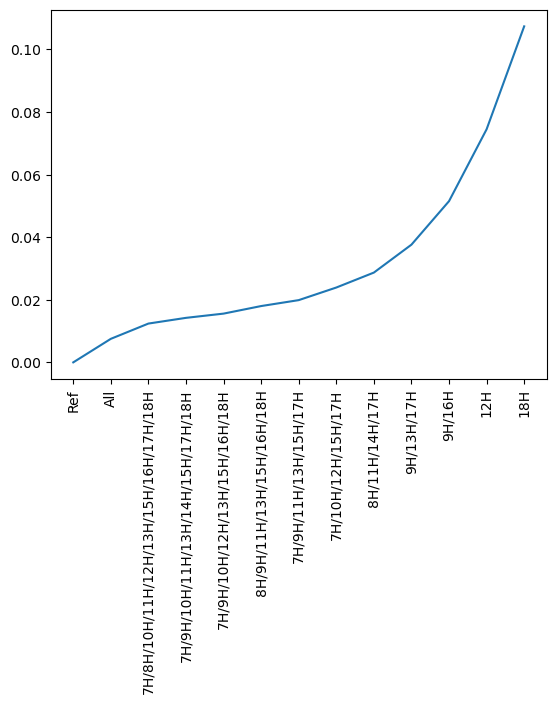

In [37]:
plot(['Ref','All']+['/'.join(h) for e,h in resultbest]+['/'.join(result[-1][1])],[0,error(Zeta,meanzeta)]+[e for e,h in resultbest]+[result[-1][0]])
xticks(rotation=90)
show()

In [ ]:
plot(['Ref','All']+['/'.join(h) for e,h in resultbest]+['/'.join(result[-1][1])],[0,error(Zeta,meanzeta)]+[e for e,h in resultbest]+[result[-1][0]])
xticks(rotation=90)
show()

In [38]:
error(Zeta,meanzeta)

0.007517109525077132

2023-01-16 11:12:20.285 python[5431:107041] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (388.24 secs).
2023-01-16 11:12:20.285 python[5431:107041] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (388.24 secs).
